In [15]:
import pandas as pd

df = pd.read_csv('AAME.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [16]:
X = df.drop(columns=['Date','Adj Close', 'Volume'])
X

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


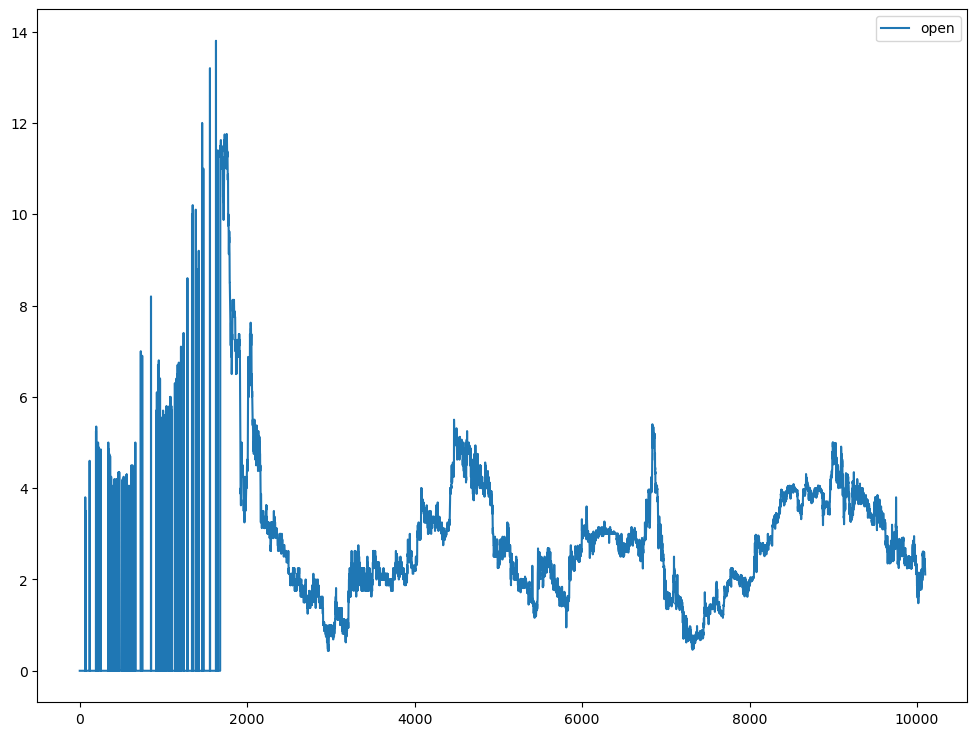

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.plot(X['Open'], label='open')
plt.legend()
plt.show()

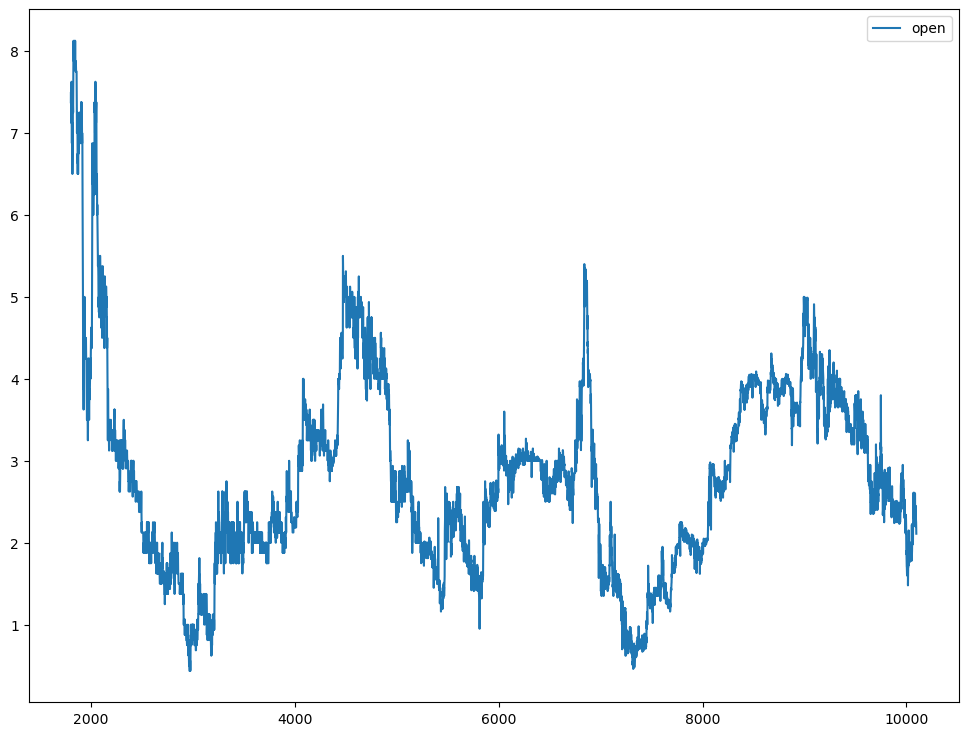

In [18]:
X = X[1800:]
plt.figure(figsize=(12,9))
plt.plot(X['Open'], label='open')
plt.legend()
plt.show()

In [19]:
X['Open']

1800     7.375
1801     7.500
1802     7.375
1803     7.125
1804     7.375
         ...  
10093    2.290
10094    2.250
10095    2.250
10096    2.110
10097    2.110
Name: Open, Length: 8298, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.90243902, 0.904     , 0.87096774, 0.91869919],
       [0.91869919, 0.936     , 0.90322581, 0.90243902],
       [0.90243902, 0.904     , 0.87096774, 0.8699187 ],
       ...,
       [0.23577236, 0.232     , 0.22645163, 0.22016262],
       [0.21756096, 0.21407999, 0.22387095, 0.21756096],
       [0.21756096, 0.21920001, 0.22387095, 0.22276424]])

In [31]:
TEST_SIZE = 200

train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]


In [37]:
import numpy as np

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window][3])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)
X_test, y_test = make_sample(test_data, 30)
X_train.shape

(8068, 30, 4)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(30,4)))
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model_history = model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0214
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.3384e-04
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.8673e-04
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.5994e-04
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.5611e-04
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.7225e-04
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.6128e-04
Epoch 8/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.5933e-04
Epoch 9/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.8171e-04
Epoch 10/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.5516e-04


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


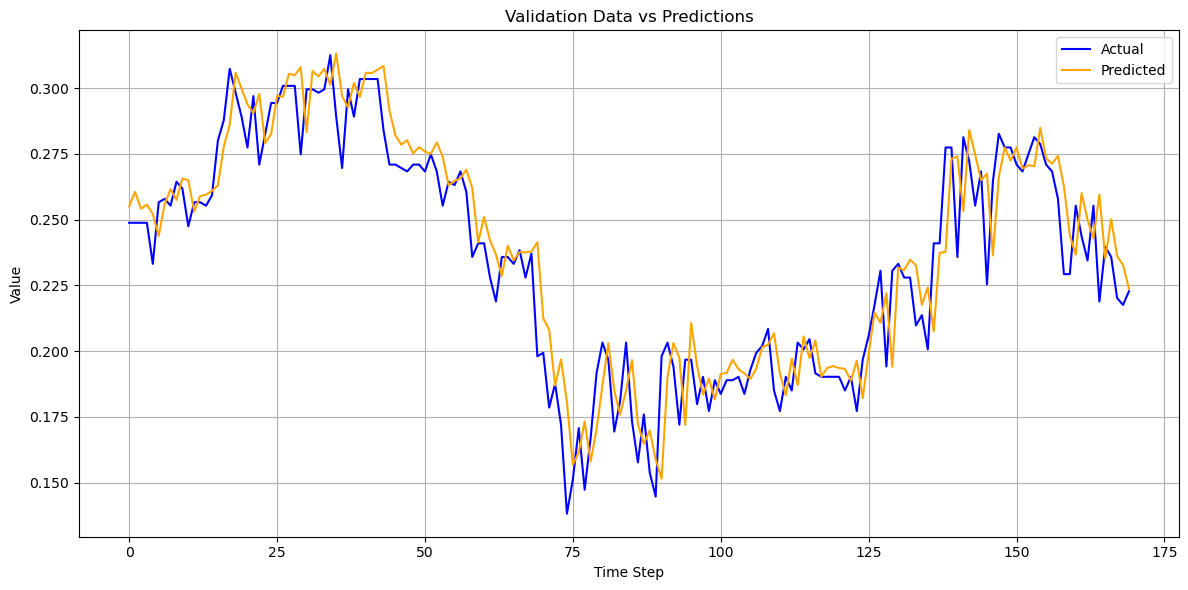

In [42]:
import matplotlib.pyplot as plt
import numpy as np

pre = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(pre, label='Predicted', color='orange')
plt.title('Validation Data vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(y_test, pre)

# 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.0003
